CHARNAY Paul - MONEDIERES Emmeline 



<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="max-width: 250px; display: inline"  alt="Wikistat"/></a>

<a href="http://www.math.univ-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo_imt.jpg" style="float:right; max-width: 250px; display: inline" alt="IMT"/> </a>
</center>

# [Scénarios d'Exploration Statistique](https://github.com/wikistat/Exploration)

# Etude AdultCensus en <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a>

## Objectif

A partir d'un recensement sur la population américaine datant de 1994, on cherche à prévoir le dépassement d'un seuil de niveau de revenus.

On va commencer par nettoyer les données, c'est-à-dire enlever les données manquantes ou aberrantes. Puis nous créerons des nouvelles variables et en regrouperons certaines.
Ensuite on va réaliser une analyse descriptive des données pour les prendre en main.

**Résumé**
Analyse de données extraites d'un recensement aux USA de 1994. Préparation des données, exploration élémentaire et multidimensionnelle ([ACP](http://wikistat.fr/pdf/st-m-explo-acp.pdf), [AFCM](http://wikistat.fr/pdf/st-m-explo-afcm.pdf)), [classification non supervisée](http://wikistat.fr/pdf/st-m-explo-classif.pdf). L'objectif est de préparer l'[étape suivante](https://github.com/wikistat/Apprentissage/tree/master/Adult-Census) consistant à modéliser / prévoir le niveau de revenu.

## Introduction
### Objectif
A refaire

### Présentation des données
#### Les variables

Num| Libellé |	Ensemble de valeurs
-|--|--|--
1|`Age`|	real
2|	`workClass`|	Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
3|	`fnlwgt`|	real
4|	`education`|	Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
5|	`educNum`|	integer
6|	`mariStat`|	Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse
7|	`occup`|	Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces
8|	`relationship`|	Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried
9|	`origEthn`|	White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
10|	`sex`|	Female, Male
11|	`capitalGain`|	real  
12|	`capitalLoss`|	real
13|	`hoursWeek`|	real
14|	`nativCountry`|	United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands
15|	`income`|		>50K, <=50K



# <FONT COLOR="Red">Épisode 1 <i>Data Munging </i></font> 
## Lecture et prétraitement  des données
Les données sont disponibles dans le répertoire de ce calepin et chargées en même temps.

Même si les données sont déjà extraites par échantillonnage d'une très grande base, elles nécessitent un travail prémiminaire (*data munging*) pour détecter, corriger les erreurs et incohérences, éliminer des redondances, traiter les données manquantes, transformer certaines variables.  Ce travail préliminaire, souvent long et fastidieux, nécessite d'y consacer beaucoup de temps et de rigueur afin de s'assurer de la qualité finale des résultats. 

Il fait appel à des outils classiques de statistique descriptive. 

Les données sont anonymisées et datent du siècle dernier, elles n'ont plus d'intérêt "commercial". De façon générale, plutôt que de conserver tous les fichiers de données intermédiaires à une étude, ce qui peut nécessiter beaucoup d'espace disque, il est important, voire crucial, d'archiver *tous* les programmes intermédiaires de saisie, sélection, transformation des données. En effet, en cas de problème ou même simplement d'un mauvais choix méthodologique, il faut pouvoir rapidement repartir d'une étape précédente. 

La production d'un calepin aide à cette mémoire lors de l'analyse préliminaire mais ne constitue pas un code opérationnel.

### Importation des librairies

In [1]:
# Librairies de base
import pandas as pd
import numpy as np
import numpy.random as npr

# Statistiques
import scipy.stats
from statsmodels.graphics.mosaicplot import mosaic

# Prédiction
import sklearn.linear_model as sklm
import sklearn.model_selection as skms
import sklearn.ensemble as skle

# ACP
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# AFC(M)
import mca

# Classification non supervisée
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd
import sklearn.cluster as sc

# Affichage
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
sns.set(style="white", context="talk")
%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

/usr/local/insa/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/insa/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/insa/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/insa/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Lecture des données

In [2]:
path = ""
colNames = ["age", "workClass", "fnlwgt", "education", "educNum", "mariStat", "occup",
            "relationship", "origEthn", "sex", "capitalGain", "capitalLoss", "hoursWeek", "nativCountry", "income"]
adult = pd.read_csv(path + 'adult.data', sep=',', header=None, index_col=None)
adult.columns = colNames
adult

,age,workClass,fnlwgt,education,educNum,mariStat,occup,relationship,origEthn,sex,capitalGain,capitalLoss,hoursWeek,nativCountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Toutes les colonnes ont bien été importées, la première correspond à un identifiant unique pour chaque personne recensée.
On va à présent préparer les données en commençant par affecter le bon type aux variables qualitatives.

In [3]:
def create_categorical_data(df, column_name):
    cat_columns = pd.Categorical(df[column_name], ordered=False)
    return cat_columns

Pour chaque variable, on liste les différentes modalités possibles puis on effectue des regroupements pour les simplifier. 
On fait ici le choix d'utiliser la fonction `map` en précisant aussi les modalités que l'on ne veut pas changer, ainsi les cellules ne contenant pas les valeurs attendues (par exemple '?') seront transformées en Nan.

In [4]:
print(np.sort(adult["mariStat"].unique()))

[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']


In [5]:
# mariStat
cat_name_dic = {" Never-married": "Never-Married", " Married-AF-spouse": "Married",
                " Married-civ-spouse": "Married", " Married-spouse-absent": "Not-Married",
                " Separated": "Not-Married", " Divorced": "Not-Married", " Widowed": "Widowed"}
adult['mariStat'] = adult.mariStat.map(cat_name_dic)

In [6]:
print(np.sort(adult["nativCountry"].unique()))

[' ?' ' Cambodia' ' Canada' ' China' ' Columbia' ' Cuba'
 ' Dominican-Republic' ' Ecuador' ' El-Salvador' ' England' ' France'
 ' Germany' ' Greece' ' Guatemala' ' Haiti' ' Holand-Netherlands'
 ' Honduras' ' Hong' ' Hungary' ' India' ' Iran' ' Ireland' ' Italy'
 ' Jamaica' ' Japan' ' Laos' ' Mexico' ' Nicaragua'
 ' Outlying-US(Guam-USVI-etc)' ' Peru' ' Philippines' ' Poland'
 ' Portugal' ' Puerto-Rico' ' Scotland' ' South' ' Taiwan' ' Thailand'
 ' Trinadad&Tobago' ' United-States' ' Vietnam' ' Yugoslavia']


In [7]:
# nativCountry
cat_country = {" Cambodia": "SE-Asia", " Canada": "British-Commonwealth", " China": "China", " Columbia": "South-America",
               " Cuba": "Other", " Dominican-Republic": "Latin-America", " Ecuador": "South-America",
               " El-Salvador": "South-America", " England": "British-Commonwealth", " France": "Euro_1",
               " Germany": "Euro_1", " Greece": "Euro_2", " Guatemala": "Latin-America", " Haiti": "Latin-America",
               " Holand-Netherlands": "Euro_1", " Honduras": "Latin-America", " Hong": "China", " Hungary": "Euro_2",
               " India": "British-Commonwealth", " Iran": "Other", " Ireland": "British-Commonwealth", " Italy": "Euro_1",
               " Jamaica": "Latin-America", " Japan": "Other", " Laos": "SE-Asia", " Mexico": "Latin-America",
               " Nicaragua": "Latin-America", " Outlying-US(Guam-USVI-etc)": "Latin-America", " Peru": "South-America",
               " Philippines": "SE-Asia", " Poland": "Euro_2", " Portugal": "Euro_2", " Puerto-Rico": "Latin-America",
               " Scotland": "British-Commonwealth", " South": "Euro_2", " Taiwan": "China", " Thailand": "SE-Asia",
               " Trinadad&Tobago": "Latin-America", " Vietnam": "SE-Asia", " United-States": "United-States",
               " Yugoslavia": "Euro_2"}
adult["nativCountry"] = adult.nativCountry.map(cat_country)

In [8]:
print(np.sort(adult["education"].unique()))

[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']


In [9]:
# education
cat_educ = {" 10th": "Dropout", " 11th": "Dropout", " 12th": "Dropout", " 1st-4th": "Dropout", " 5th-6th": "Dropout",
            " 7th-8th": "Dropout", " 9th": "Dropout", " Assoc-acdm": "Associates", " Assoc-voc": "Associates",
            " Bachelors": "Bachelors", " Doctorate": "Doctorate", " HS-grad": "HS-grad", " Masters": "Masters",
            " Preschool": "Dropout", " Prof-school": "Prof-School", " Some-college": "HS-Graduate"}
adult["education"] = adult.education.map(cat_educ)

In [10]:
print(np.sort(adult["workClass"].unique()))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']


In [11]:
# workClass
cat_work = {" Federal-gov": "Federal-Govt", " Local-gov": "Other-Govt", " State-gov": "Other-Govt", " Private": "Private",
            " Self-emp-inc": "Self-Employed", " Self-emp-not-inc": "Self-Employed", " Without-pay": "Not-Working",
            " Never-worked": "Not-Working"}
adult["workClass"] = adult.workClass.map(cat_work)

In [12]:
print(np.sort(adult["occup"].unique()))

[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


Ici, puisque les observations valant `Armed Forces` sont ensuite abandonnées, on fait le choix de les mettre directement à Nan.

In [13]:
# occup
cat_occup = {" Adm-clerical": "Admin", " Craft-repair": "Blue-Collar", " Exec-managerial": "White-Collar",
             " Farming-fishing": "Blue-Collar", " Handlers-cleaners": "Blue-Collar", " Machine-op-inspct": "Blue-Collar",
             " Other-service": "Service", " Priv-house-serv": "Service", " Prof-specialty": "Professional",
             " Protective-serv": "Other-occups", " Sales": "Sales", " Tech-support": "Other-occups",
             " Transport-moving": "Blue-Collar"}
adult["occup"] = adult.occup.map(cat_occup)

In [14]:
print(np.sort(adult["origEthn"].unique()))

[' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White']


In [15]:
# origEthn
cat_orig = {" White": "White", " Black": "Black", " Amer-Indian-Eskimo": "Amer-Indian", " Asian-Pac-Islander": "Asian",
            " Other": "Other"}
adult["origEthn"] = adult.origEthn.map(cat_orig)

### Création de nouvelles variables

In [16]:
adult["LcapitalGain"] = np.log(1 + adult["capitalGain"])
adult["LcapitalLoss"] = np.log(1 + adult["capitalLoss"])

# capital
def quantileCapitalGain(capital):
    if type(capital) != int:
        result = np.nan
    elif capital <= 0:
        result = "None"
    elif capital <= np.median(adult[adult["capitalGain"] > 0]["capitalGain"]):
        result = "cgLow"
    else:
        result = "cgHigh"
    return result


adult["capitalGain"] = list(map(quantileCapitalGain, adult.capitalGain))

def quantileCapitalLoss(capital):
    if type(capital) != int:
        result = np.nan
    elif capital <= 0:
        result = "None"
    elif capital <= np.median(adult[adult["capitalLoss"] > 0]["capitalLoss"]):
        result = "clLow"
    else:
        result = "clHigh"
    return result


adult["capitalLoss"] = list(map(quantileCapitalLoss, adult.capitalLoss))

In [17]:
adult["ageQ"] = pd.qcut(adult.age, 5, labels=["Ag1", "Ag2", "Ag3", "Ag4", "Ag5"])

A présent on va rendre la variable `hoursWeek` qualitative en définissant les différentes classes.

In [18]:
adult["hoursWeekQ"] = pd.cut(adult.hoursWeek, bins=np.array([0, 39, 41, 100]), labels=["HW1", "HW2", "HW3"])

In [19]:
def create_categorical_data_rename(df, column_name, cat_name_dic):
    cat_columns = pd.Categorical(df[column_name], ordered=False)
    new_categorie = [cat_name_dic[old_name] for old_name in cat_columns.categories]
    return cat_columns.rename_categories(new_categorie)

In [20]:
print(np.sort(adult["income"].unique()))

[' <=50K' ' >50K']


In [21]:
adult["income"] = create_categorical_data_rename(adult, "income", {" <=50K": "incLow", " >50K": "incHigh"})

In [22]:
for name in ["workClass", "education", "mariStat", "occup", "relationship", "origEthn", "sex", "capitalGain", 
             "capitalLoss", "nativCountry"]:
    adult[name] = create_categorical_data(adult, name)

### Nettoyage des lignes incomplètes

In [23]:
adult = adult[np.logical_not(adult.isnull().any(axis=1))]

adult

,age,workClass,fnlwgt,education,educNum,mariStat,occup,relationship,origEthn,sex,capitalGain,capitalLoss,hoursWeek,nativCountry,income,LcapitalGain,LcapitalLoss,ageQ,hoursWeekQ
0,39,Other-Govt,77516,Bachelors,13,Never-Married,Admin,Not-in-family,White,Male,cgLow,None,40,United-States,incLow,7.684784,0.000000,Ag3,HW2
1,50,Self-Employed,83311,Bachelors,13,Married,White-Collar,Husband,White,Male,None,None,13,United-States,incLow,0.000000,0.000000,Ag4,HW1
2,38,Private,215646,HS-grad,9,Not-Married,Blue-Collar,Not-in-family,White,Male,None,None,40,United-States,incLow,0.000000,0.000000,Ag3,HW2
3,53,Private,234721,Dropout,7,Married,Blue-Collar,Husband,Black,Male,None,None,40,United-States,incLow,0.000000,0.000000,Ag5,HW2
4,28,Private,338409,Bachelors,13,Married,Professional,Wife,Black,Female,None,None,40,Other,incLow,0.000000,0.000000,Ag2,HW2
5,37,Private,284582,Masters,14,Married,White-Collar,Wife,White,Female,None,None,40,United-States,incLow,0.000000,0.000000,Ag3,HW2
6,49,Private,160187,Dropout,5,Not-Married,Service,Not-in-family,Black,Female,None,None,16,Latin-America,incLow,0.000000,0.000000,Ag4,HW1
7,52,Self-Employed,209642,HS-grad,9,Married,White-Collar,Husband,White,Male,None,None,45,United-States,incHigh,0.000000,0.000000,Ag5,HW3
8,31,Private,45781,Masters,14,Never-Married,Professional,Not-in-family,White,Female,cgHigh,None,50,United-States,incHigh,9.552866,0.000000,Ag2,HW3
9,42,Private,159449,Bachelors,13,Married,White-Collar,Husband,White,Male,cgLow,None,40,United-States,incHigh,8.552367,0.000000,Ag4,HW2


On a maintenant bien nettoyé les données, il ne devrait plus rester de valeurs non affectées. On peut passer à la partie descriptive.

## 2 Description

In [24]:
adult.describe()

,age,fnlwgt,educNum,hoursWeek,LcapitalGain,LcapitalLoss
count,30153.000000,3.015300e+04,30153.000000,30153.000000,30153.000000,30153.000000
mean,38.440354,1.897862e+05,10.121315,40.931317,0.743869,0.355082
std,13.135197,1.056591e+05,2.550162,11.979579,2.470854,1.594700
min,17.000000,1.376900e+04,1.000000,1.000000,0.000000,0.000000
25%,28.000000,1.176180e+05,9.000000,40.000000,0.000000,0.000000
50%,37.000000,1.784210e+05,10.000000,40.000000,0.000000,0.000000
75%,47.000000,2.376240e+05,13.000000,45.000000,0.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99.000000,11.512925,8.379539


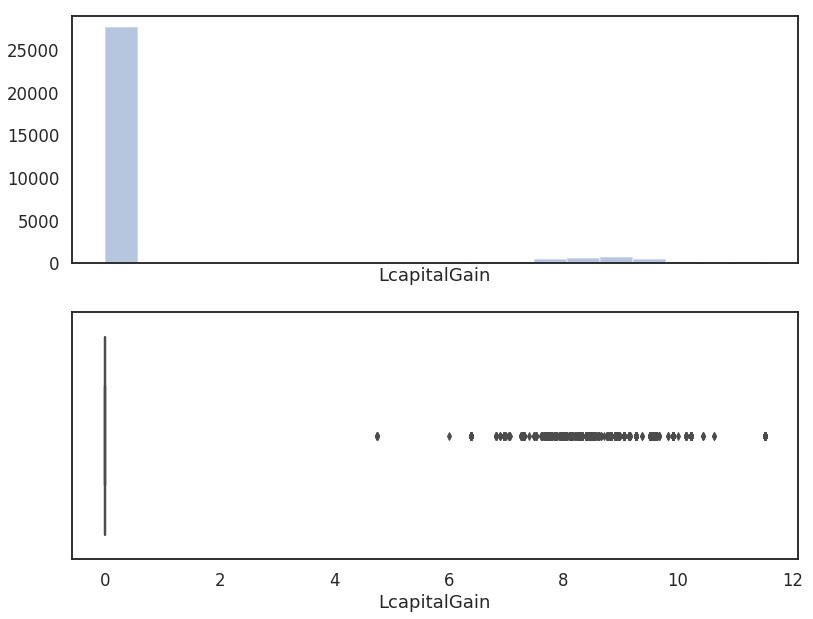

In [25]:
fig, axs = plt.subplots(2, 1, figsize=(13, 10), sharex=True)
sns.distplot(adult["LcapitalGain"], hist=True, kde=False, bins=20, ax=axs[0])
sns.boxplot(adult["LcapitalGain"], orient="h", ax=axs[1])
plt.show()

In [26]:
adult["capitalGain"].describe()

count     30153
unique        3
top        None
freq      27615
Name: capitalGain, dtype: object

La variable `LcapitalLoss` subit le même traitement, et les mêmes conclusions restent valables.

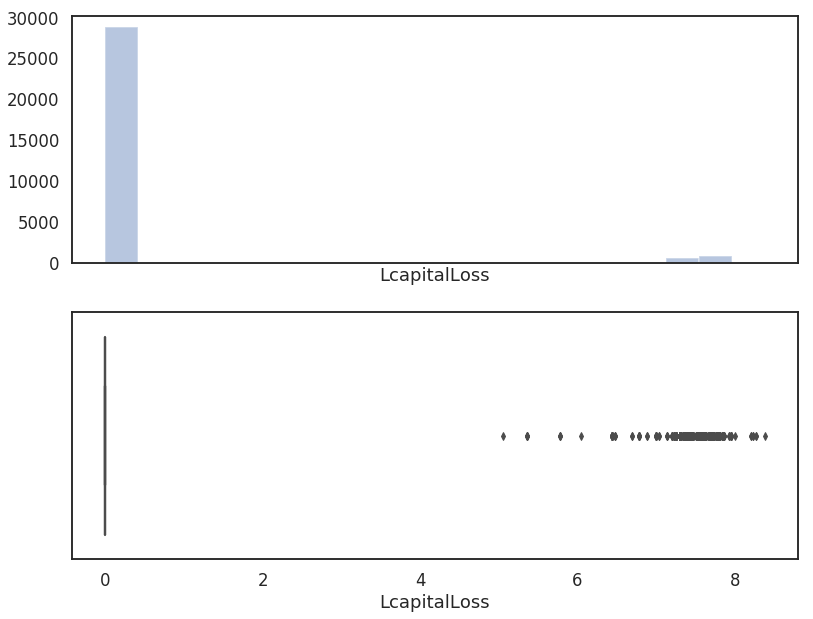

In [27]:
fig, axs = plt.subplots(2, 1, figsize=(13, 10), sharex=True)
sns.distplot(adult["LcapitalLoss"], hist=True, kde=False, bins=20, ax=axs[0])
sns.boxplot(adult["LcapitalLoss"], orient="h", ax=axs[1])
plt.show()

Certains couples de variables posent des problèmes. 

In [28]:
pd.crosstab(adult["relationship"], adult["sex"])

sex,Female,Male
relationship,,
Husband,1,12460
Not-in-family,3566,4156
Other-relative,386,501
Own-child,1961,2504
Unmarried,2463,749
Wife,1405,1


In [29]:
pd.crosstab(adult["education"], adult["educNum"])

educNum,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
Associates,0,0,0,0,0,0,0,0,0,0,1307,1008,0,0,0,0
Bachelors,0,0,0,0,0,0,0,0,0,0,0,0,5043,0,0,0
Doctorate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,375
Dropout,45,151,288,557,455,820,1048,376,0,0,0,0,0,0,0,0
HS-Graduate,0,0,0,0,0,0,0,0,0,6676,0,0,0,0,0,0
HS-grad,0,0,0,0,0,0,0,0,9836,0,0,0,0,0,0,0
Masters,0,0,0,0,0,0,0,0,0,0,0,0,0,1626,0,0
Prof-School,0,0,0,0,0,0,0,0,0,0,0,0,0,0,542,0


In [30]:
pd.crosstab(adult["mariStat"], adult["relationship"])

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
mariStat,,,,,,
Married,12461,14,118,84,0,1406
Never-Married,0,4444,547,3928,801,0
Not-Married,0,2832,182,441,2068,0
Widowed,0,432,40,12,343,0


In [31]:
pd.crosstab(adult["origEthn"], adult["nativCountry"])

nativCountry,British-Commonwealth,China,Euro_1,Euro_2,Latin-America,Other,SE-Asia,South-America,United-States
origEthn,,,,,,,,,
Amer-Indian,0,1,1,2,9,0,1,1,270
Asian,88,122,2,71,6,43,290,0,273
Black,9,0,7,0,164,6,1,1,2628
Other,6,0,1,0,86,5,0,20,113
White,225,6,213,146,783,139,12,191,24211


Les valeurs Wife et Husband de la variable `relationship` portent déjà l'information de la variable `sex`. On remarque d'ailleurs une probable erreur de saisie avec un homme marqué Wife et une femme Husband. L'échantillon étant très large, on décide de supprimer ces deux observations.

In [32]:
adult = adult[(adult["sex"] != "Female") | (adult["relationship"] != "Husband")]
adult = adult[(adult["sex"] != "Male") | (adult["relationship"] != "Wife")]

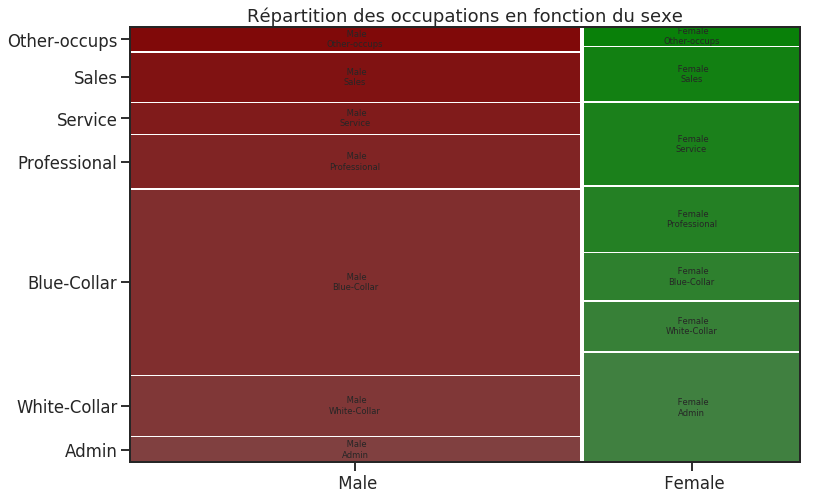

In [33]:
fig, ax = plt.subplots(figsize=(12, 8))
mosaic(adult, ["sex", "occup"], ax=ax)
plt.title("Répartition des occupations en fonction du sexe")
plt.show()

In [34]:
tab = pd.crosstab(adult["sex"], adult["occup"])
print("p-valeur : ", scipy.stats.chi2_contingency(tab)[1])

p-valeur :  0.0


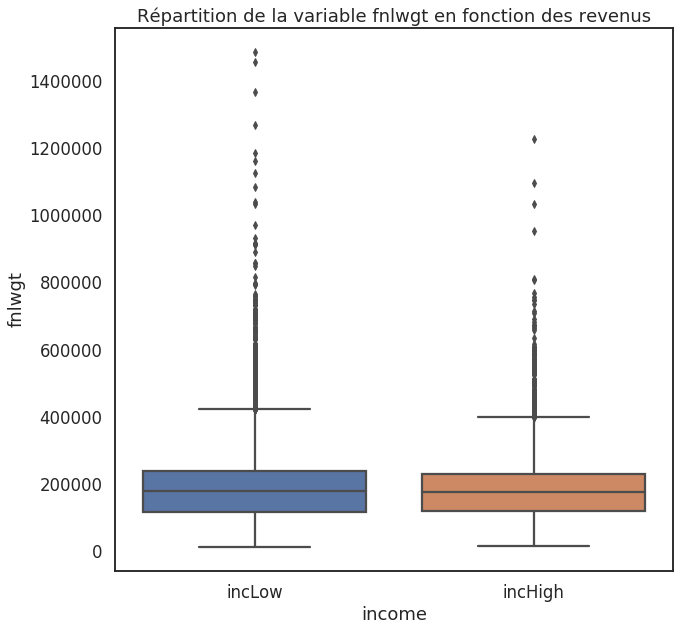

In [35]:
fig = plt.figure(figsize=(10, 10))
sns.boxplot(adult["income"], adult["fnlwgt"], orient='v')
plt.title("Répartition de la variable fnlwgt en fonction des revenus")
plt.show()

On voit que la variable `income` ne semble pas influente sur la répartition de la variable `fnlwgt`. On va maintenant étudier l'influence de l'âge et du niveau d'éducation sur le niveau de revenus.

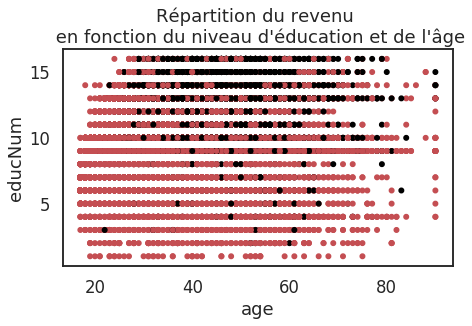

In [36]:
fig, ax = plt.subplots(figsize=(7, 4))
col = adult["income"].map({"incHigh": 'black', "incLow": 'r'})
adult.plot.scatter(x="age", y="educNum", c=col, alpha=1, ax=ax)
plt.title("Répartition du revenu \n en fonction du niveau d'éducation et de l'âge")
plt.show()

On va essayer d'ajuster un modèle de **régression logistique** sur ces deux variables pour voir si elles permettent de prédire le dépassement du seuil de revenu de manière satisfaisante.

In [37]:
X_train, X_test, Y_train, Y_test = skms.train_test_split(adult[["educNum", "age"]],
                                                         adult["income"].map({"incHigh": 1, "incLow": 0}), test_size=10000)
logit = sklm.LogisticRegression(multi_class='ovr', solver='lbfgs')
pred = logit.fit(X_train, Y_train).predict(X_test)
df_pred = pd.DataFrame({'pred': pred})

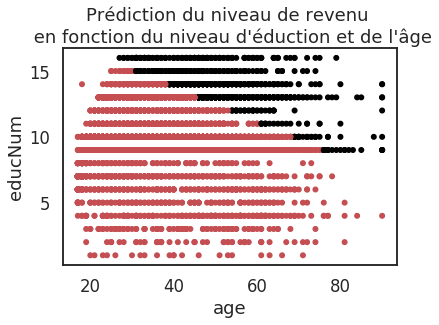

In [38]:
X_test.plot.scatter(x="age", y="educNum", c=df_pred['pred'].map({1:'black', 0:'r'}))
plt.title("Prédiction du niveau de revenu \n en fonction du niveau d'éduction et de l'âge")
plt.show()

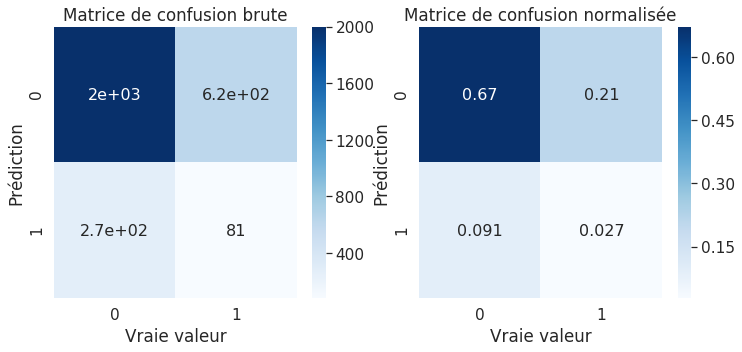

In [39]:
table = pd.crosstab(df_pred["pred"], Y_test, rownames=["Prédiction"], colnames=["Vraie valeur"], normalize=False)
table_norm = pd.crosstab(df_pred["pred"], Y_test, rownames=["Prédiction"], colnames=["Vraie valeur"], normalize="all")
sns.set(font_scale=1.4)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.heatmap(table, annot=True, cmap="Blues", ax=ax[0], annot_kws={"size": 16})  # font size
ax[0].set_title("Matrice de confusion brute")
sns.heatmap(table_norm, annot=True, cmap="Blues", ax=ax[1], annot_kws={"size": 16}) # font size
ax[1].set_title("Matrice de confusion normalisée")
plt.show()

La prédiction est assez mauvaise, mais on retrouve l'idée que les personnes à haut revenus sont celles qui sont plutôt âgées et fortement diplômées.

On fait la même prédiction avec Random Forest.

In [40]:
forest = skle.RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=None, min_samples_split=2,
                                     min_samples_leaf=1, max_features='auto', max_leaf_nodes=None, bootstrap=True)

pred = forest.fit(X_train, Y_train).predict(X_test)
df_pred_rf = pd.DataFrame({"pred": pred})

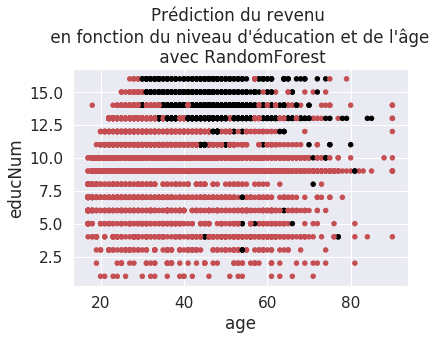

In [41]:
X_test.plot.scatter(x="age", y="educNum", c=df_pred_rf["pred"].map({1: 'black', 0: 'r'}))
plt.title("Prédiction du revenu \n en fonction du niveau d'éducation et de l'âge \n avec RandomForest")
plt.show()

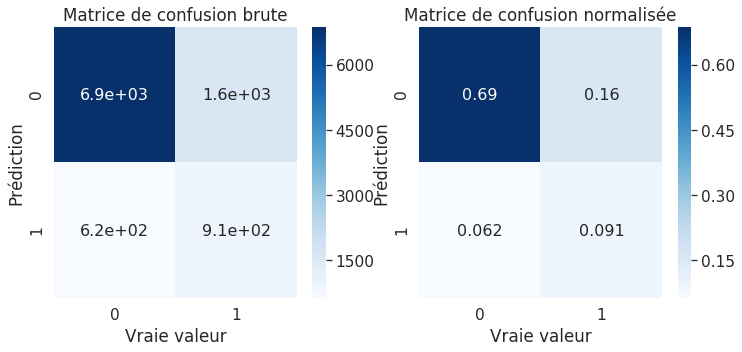

In [42]:
table = pd.crosstab(pred, Y_test, rownames=["Prédiction"], colnames=["Vraie valeur"], normalize=False)
table_norm = pd.crosstab(pred, Y_test, rownames=["Prédiction"], colnames=["Vraie valeur"], normalize="all")
sns.set(font_scale=1.4)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.heatmap(table, annot=True, cmap="Blues", ax=ax[0], annot_kws={"size": 16})
ax[0].set_title("Matrice de confusion brute")
sns.heatmap(table_norm, annot=True, cmap="Blues", ax=ax[1], annot_kws={"size": 16})
ax[1].set_title("Matrice de confusion normalisée")
plt.show()

La prédiction est un peu meilleure mais ces deux variables ne suffisent pas à prédire le dépassement du seuil de revenus.

## 3 [Analyse en composantes principales](http://wikistat.fr/pdf/st-m-explo-acp.pdf)


On enlève `fnlwgt` de l'ACP car on a vu que cette variable n'avait pas grand intérêt pour prédire la variable cible.

In [43]:
# définition de la commande
pca = PCA()
# Liste des variables quantitatives
quantit = [name for name in list(adult) if (adult[name].dtype.name != "category" and name != "fnlwgt")]                                                        
# Sélection des variables quantitatives
dat = adult[quantit]
# On réalise directement la conversion en float pour éviter le warning de scale
quantit_convert = [name for name in quantit if (adult[name].dtype.name != "float64")] 
for name in quantit_convert:
    dat[name] = dat[name].map(float)
# réduction
data = pd.DataFrame(scale(dat), columns=dat.columns)
# composantes principales
C = pca.fit_transform(data)

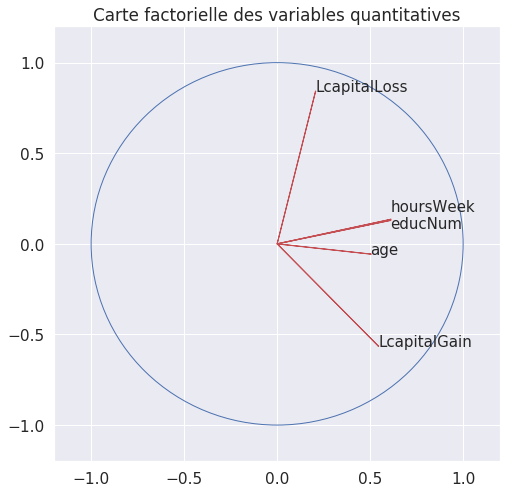

In [44]:
# coordonnées des variables
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])

fig, ax = plt.subplots(figsize=(8,8))

for i, j, nom in zip(coord1, coord2, data.columns):
    if nom == "hoursWeek":
        plt.text(i, j + 0.05, nom, size=15)   # Pour éviter que les deux labels se marchent sur les pieds
    elif nom == "educNum":
        plt.text(i, j - 0.05, nom, size=15)   # Pour éviter que les deux labels se marchent sur les pieds
    else:
        plt.text(i, j, nom, size=15)
    plt.arrow(0, 0, i, j, color='r')
plt.axis((-1.2, 1.2, -1.2, 1.2))

cercle = plt.Circle((0,0), radius=1, color='b', fill=False)
ax.add_patch(cercle)
plt.title("Carte factorielle des variables quantitatives")
plt.show()

L'axe 1 représente le volume de travail par semaine et le niveau d'éducation. Les individus situés plus à droite travaillent plus et ont probablement de meilleurs salaires grâce à un plus haut niveau d'éducation.

Le deuxième axe représente la différence entre les pertes et les gains de capitaux.

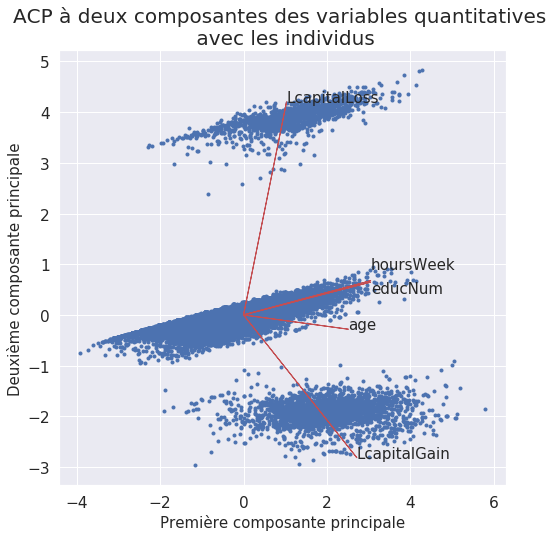

In [45]:
fig = plt.figure(figsize = (8,8))

echelle = 5
plt.xlabel('Première composante principale', fontsize = 15)
plt.ylabel('Deuxième composante principale', fontsize = 15)
plt.title('ACP à deux composantes des variables quantitatives \n avec les individus', fontsize = 20)
plt.scatter(C[:,0], C[:,1], marker='.')
for i, j, nom in zip(coord1,coord2, data.columns):
    if nom == "hoursWeek":
        plt.text(echelle * i, echelle * (j + 0.05), nom, size=15)   # Pour éviter que les deux labels se marchent sur les pieds
    elif nom == "educNum":
        plt.text(echelle * i, echelle * (j - 0.05), nom, size=15)   # Pour éviter que les deux labels se marchent sur les pieds
    else:
        plt.text(echelle * i, echelle * j, nom, size=15)
        
    plt.arrow(0, 0, echelle * i, echelle * j, color='r')
plt.show()

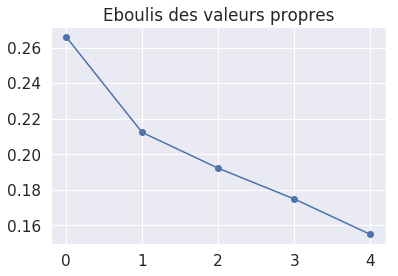

In [46]:
plt.plot(pca.explained_variance_ratio_[:10], marker='o')
plt.title("Eboulis des valeurs propres")
plt.show()

On observe un coude au niveau de la deuxième valeur propre, ce qui justifie de ne garder que les deux premières composantes principales pour l'ACP.

## 4 [Analyse factorielle des correspondances](http://wikistat.fr/pdf/st-m-explo-afc.pdf) de la table `occup` *vs.* `education`

In [47]:
table = pd.crosstab(adult["occup"], adult["education"])
table

education,Associates,Bachelors,Doctorate,Dropout,HS-Graduate,HS-grad,Masters,Prof-School
occup,,,,,,,,
Admin,356,498,4,174,1264,1350,67,8
Blue-Collar,640,459,5,2127,1875,4734,53,14
Other-occups,280,323,2,53,469,372,49,8
Professional,306,1461,302,55,423,229,819,443
Sales,246,793,8,343,996,1052,129,17
Service,194,176,0,884,779,1300,18,4
White-Collar,293,1333,54,104,870,799,491,48


In [48]:
print("p-valeur : ", scipy.stats.chi2_contingency(tab)[1])

p-valeur :  0.0


La p-valeur est nulle, donc on rejette H0 et les variables `occup` et `education` sont liées. Il est utile de faire l'analyse des correspondances.

In [49]:
D = pd.DataFrame(pd.get_dummies(adult[["education", "occup"]]))
AFC = mca.MCA(D, ncols=2, benzecri=True)

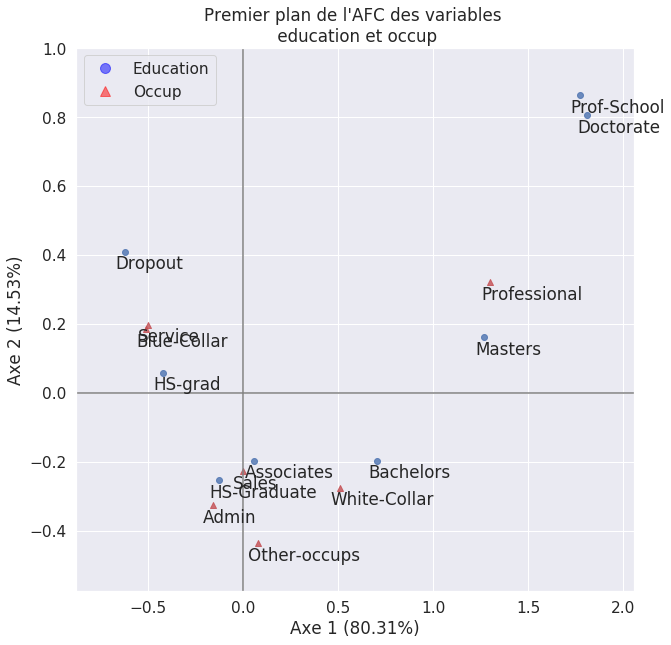

In [50]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.title("Premier plan de l'AFC des variables \n education et occup")
plt.margins(0.1)
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
variancesAFC = AFC.expl_var()
plt.xlabel('Axe 1 (' + "{0:.2%}".format(variancesAFC[0]) + ')')
plt.ylabel('Axe 2 (' + "{0:.2%}".format(variancesAFC[1]) + ')')
ax.margins(0.1)

prem_car = [x[0:3] for x in D.columns]
col = ['b' if x == 'edu' else 'r' for x in prem_car]
markers = ['o' if x == 'edu' else '^' for x in prem_car]

for coord, nom, marker, color in zip(AFC.fs_c()[:, :2], D.columns, markers, col):
    i, j = coord
    plt.scatter(-i, -j, marker=marker, c=color, alpha=0.8)
    plt.text(-i - 0.05, -j - 0.05, nom[nom.find('_') + 1 :])

legend_elements = [Line2D([0], [0], marker='o', color='blue', label='Education', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='^', color='red', label='Occup', markersize=10, linewidth=0, alpha=0.5)]

ax.legend(handles=legend_elements)
plt.show()

1) Analyse des profils ligne :
* Les gens ayant le plus d'éducation (Doctorate et Prof-School) ont des répartitions similaires. HS-Graduates et Associates ont aussi des répartitions semblables.
   
   
2) Analyse des profils colonne :
* On remarque que Service et BlueCollar ont sensiblement la même répartition, idem pour Sales et Admin.


3) Analyse des relations lignes-colonnes :
* Les personnes ayant un doctorat ou étant professeurs d'université ont une proportion plus élevée qu'attendu dans l'occupation "Professional", à peu près celle attendue chez les travailleurs manuels. C'est un artefact un peu bizarre car les modalités sont ordonnées. On obtient une forme en fer à cheval, c'est l'effet Guttman car la diagonale de la table de contingence est très chargée, ce qui rapproche les extrêmes et crée une fausse proximité.

## 5 [Analyse factorielle multiple des correspondances](http://wikistat.fr/pdf/st-m-explo-afcm.pdf)

In [51]:
ind_ech = npr.choice(adult.index.values, 10000)
dataq = pd.DataFrame(pd.get_dummies(adult.loc[ind_ech, ["workClass", "education", "mariStat", "occup", "sex", "capitalGain", 
                                           "capitalLoss", "income", "ageQ", "hoursWeekQ"]]))

In [52]:
afcm = mca.MCA(dataq, ncols=10, benzecri=False)

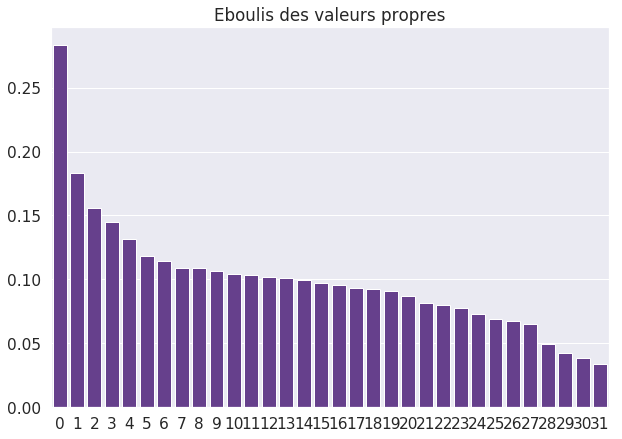

In [53]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(list(range(len(afcm.L))), afcm.L, color='rebeccapurple')
plt.title("Eboulis des valeurs propres")
plt.show()

On garde deux axes.

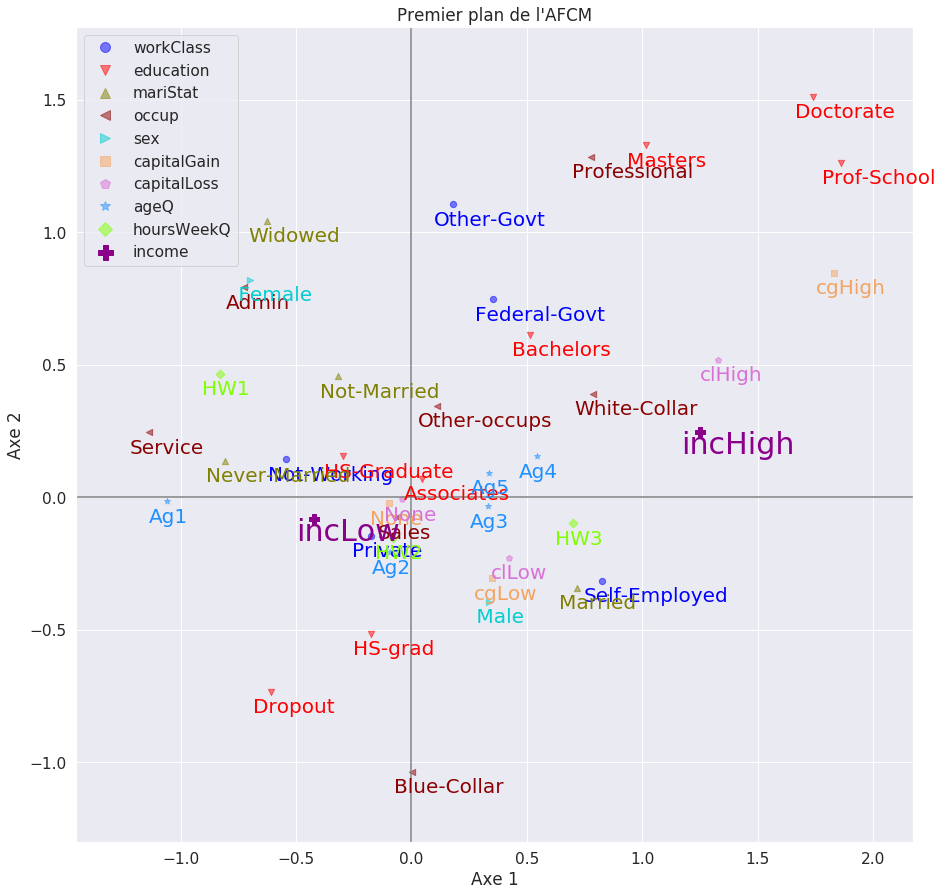

In [54]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.title("Premier plan de l'AFCM")
plt.margins(0.1)
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.xlabel('Axe 1')
plt.ylabel('Axe 2')
ax.margins(0.1)

dict_color = {'workClass': 'blue',
              'education': 'red',
              'mariStat': 'olive',
              'occup': 'darkred',
              'sex': 'darkturquoise',
              'capitalGain': 'sandybrown',
              'capitalLoss': 'orchid',
              'income': 'darkmagenta',
              'ageQ': 'dodgerblue',
              'hoursWeekQ': 'chartreuse'}

dict_marker = {'workClass': 'o',
               'education': 'v',
               'mariStat': '^',
               'occup': '<',
               'sex': '>',
               'capitalGain': 's',
               'capitalLoss': 'p',
               'income': 'P',
               'ageQ': '*',
               'hoursWeekQ': 'D'}


for coord, nom in zip(afcm.fs_c()[:, :2], dataq.columns) :
    i, j = coord
    nom_categorie = nom[: nom.find("_")]
    if nom_categorie == "income":
        plt.scatter(i, -j, marker=dict_marker[nom_categorie], color=dict_color[nom_categorie], s=100, alpha=1)
        plt.text(i - 0.08, -j - 0.08, nom[nom.find('_') + 1 :], color=dict_color[nom_categorie], size=30)
    else:
        plt.scatter(i, -j, marker=dict_marker[nom_categorie], color=dict_color[nom_categorie], s=40, alpha=0.5)
        plt.text(i - 0.08, -j - 0.08, nom[nom.find('_') + 1 :], color=dict_color[nom_categorie], size=20)

legend_elements = [Line2D([0], [0], marker='o', color='blue', label='workClass', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='v', color='red', label='education', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='^', color='olive', label='mariStat', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='<', color='darkred', label='occup', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='>', color='darkturquoise', label='sex', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='s', color='sandybrown', label='capitalGain', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='p', color='orchid', label='capitalLoss', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='*', color='dodgerblue', label='ageQ', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='D', color='chartreuse', label='hoursWeekQ', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='P', color='darkmagenta', label='income', markersize=15, linewidth=0, alpha=1)]

ax.legend(handles=legend_elements)
plt.show()

On distingue une diagonale le long de laquelle s'alignent les différents niveaux d'études. Les postes de la variable `workClass` sont aussi alignés le long de cette diagonale, de manière assez naturelle (on s'attend à ce que les personnes ayant fait de longues études aient des postes à plus haute responsabilité).

La variable `sex` semble indépendante du niveau d'études : les hommes et les femmes ont donc la même répartition de niveau d'études.

La différence entre les hommes et les femmes est le niveau d'heures de travail par semaine.

In [55]:
ind_ech = npr.choice(adult.index.values, adult.shape[0] // 3)
dataq_ech = pd.DataFrame(pd.get_dummies(adult.loc[ind_ech, ["workClass", "education", "mariStat", "occup", "sex", "capitalGain", 
                                           "capitalLoss", "income", "ageQ", "hoursWeekQ"]]))

In [56]:
afcm_ech = mca.MCA(dataq_ech, ncols=10, benzecri=False)

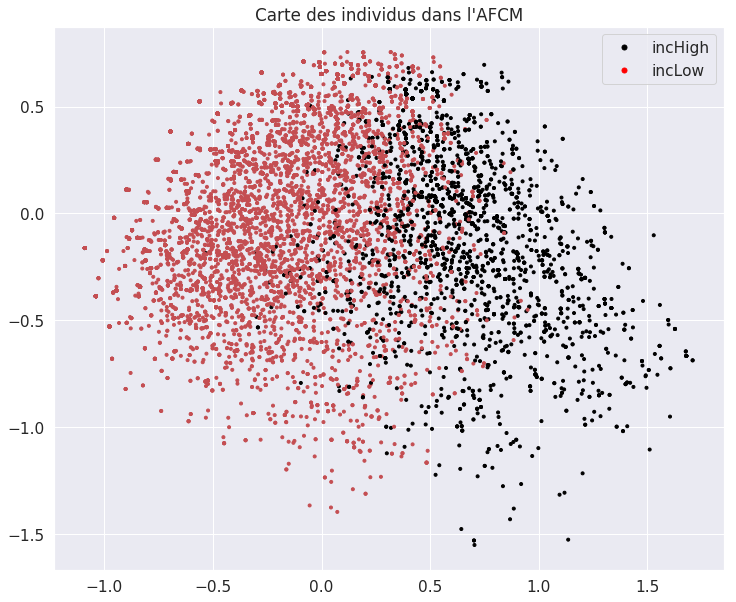

In [57]:
col = adult.loc[ind_ech, "income"].map({"incHigh":'black', "incLow":'r'})
coord_ind = afcm_ech.fs_r()
fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(coord_ind[:, 0], -coord_ind[:, 1], marker='.', c=col)
plt.title("Carte des individus dans l'AFCM")
legend_elements = [Line2D([0], [0], marker='o', color='black', label='incHigh', markersize=5, linewidth=0, alpha=1),
                   Line2D([0], [0], marker='o', color='red', label='incLow', markersize=5, linewidth=0, alpha=1),
                   ]
ax.legend(handles=legend_elements)
plt.show()

## 6 [Classification non supervisée](http://wikistat.fr/pdf/st-m-explo-classif.pdf)

In [58]:
ind_ech = npr.choice(adult.index.values, 10000)
dataq_ech = pd.DataFrame(pd.get_dummies(adult.loc[ind_ech, ["workClass", "education", "mariStat", "occup", "sex", "capitalGain", 
                                           "capitalLoss", "income", "ageQ", "hoursWeekQ"]]))

In [59]:
afcm_ech = mca.MCA(dataq_ech, ncols=10, benzecri=False)
coord_ind = afcm_ech.fs_r()
dist_ind = ssd.pdist(coord_ind, 'euclidean')
dist_ech = sch.linkage(dist_ind, 'ward')

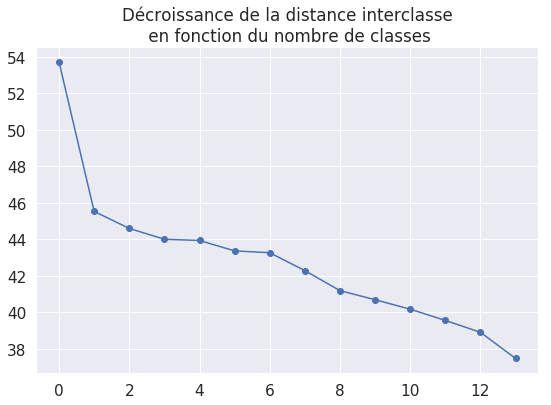

In [60]:
fig, ax = plt.subplots(figsize=(9, 6))
plt.plot(range(14), sch.maxdists(dist_ech)[:-15:-1], marker='o')
plt.title("Décroissance de la distance interclasse\n en fonction du nombre de classes")
plt.show()

In [61]:
clust = sc.k_means(dataq_ech, 5)

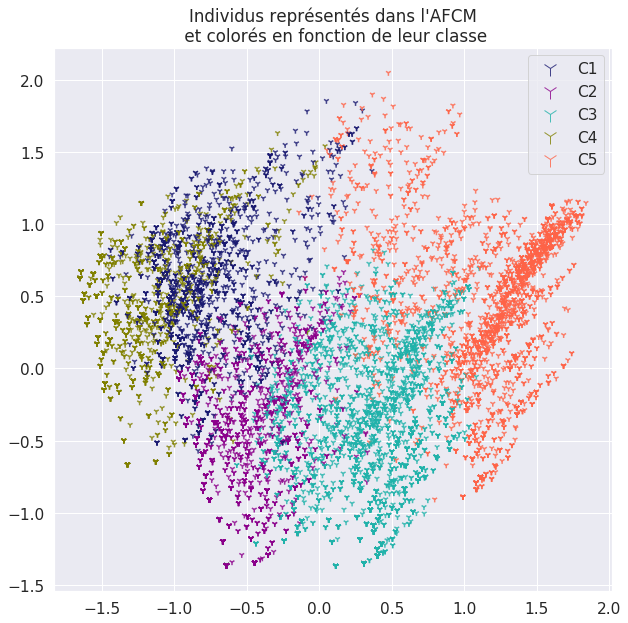

In [62]:
pca = PCA()
acp_dist = pca.fit_transform(dataq_ech)
plt.figure(figsize=(10, 10))
color_dict = {0:'midnightblue', 1:'darkmagenta', 2: 'lightseagreen', 3 : "olive", 4 : "tomato"}
list_col = [color_dict[i] for i in clust[1]]
plt.scatter(acp_dist[:,0], acp_dist[:,1], marker='1', c=list_col, cmap=plt.cm.Set1, alpha=0.8)
plt.title("Individus représentés dans l'AFCM\n et colorés en fonction de leur classe")
legend_elements = [Line2D([0], [0], marker='1', color='midnightblue', label='C1', markersize=15, linewidth=0, alpha=0.8),
                   Line2D([0], [0], marker='1', color='darkmagenta', label='C2', markersize=15, linewidth=0, alpha=0.8),
                   Line2D([0], [0], marker='1', color='lightseagreen', label='C3', markersize=15, linewidth=0, alpha=0.8),
                   Line2D([0], [0], marker='1', color='olive', label='C4', markersize=15, linewidth=0, alpha=0.8),
                   Line2D([0], [0], marker='1', color='tomato', label='C5', markersize=15, linewidth=0, alpha=0.8),
                   ]

plt.legend(handles=legend_elements)
plt.show()

In [63]:
data_classes = pd.DataFrame({"Classe" : clust[1]})
classe_name_dic = {0: 'Classe_C1', 1: 'Classe_C2', 2 : 'Classe_C3', 3 : 'Classe_C4', 4 : 'Classe_C5'}
data_classes = data_classes.Classe.map(classe_name_dic)

In [64]:
dataq_ech = pd.concat([dataq_ech, pd.get_dummies(data_classes).set_index(pd.Index(ind_ech))], axis=1)

In [65]:
afcm_classes = mca.MCA(dataq_ech, ncols=11, benzecri=False)

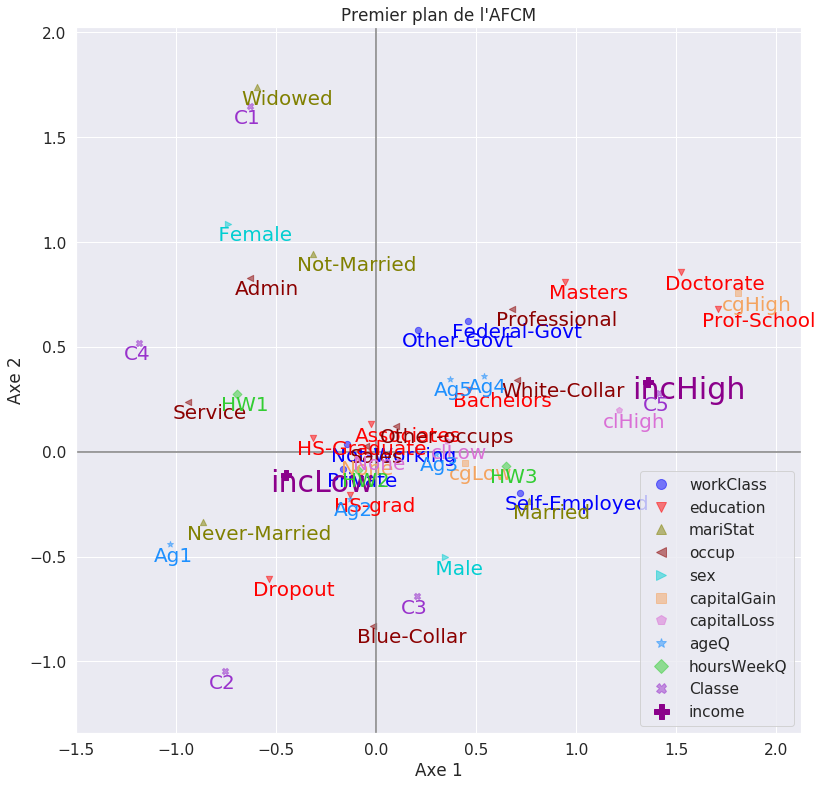

In [66]:
kmeans_afcm = sc.k_means(afcm_ech.fs_r(), 5)

fig, ax = plt.subplots(figsize=(13, 13))
plt.title("Premier plan de l'AFCM")
plt.margins(0.1)
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.xlabel('Axe 1')
plt.ylabel('Axe 2')
ax.margins(0.1)

dict_color = {'workClass': 'blue',
              'education': 'red',
              'mariStat': 'olive',
              'occup': 'darkred',
              'sex': 'darkturquoise',
              'capitalGain': 'sandybrown',
              'capitalLoss': 'orchid',
              'income': 'darkmagenta',
              'ageQ': 'dodgerblue',
              'hoursWeekQ': 'limegreen',
              'Classe' : 'darkorchid'}

dict_marker = {'workClass': 'o',
               'education': 'v',
               'mariStat': '^',
               'occup': '<',
               'sex': '>',
               'capitalGain': 's',
               'capitalLoss': 'p',
               'income': 'P',
               'ageQ': '*',
               'hoursWeekQ': 'D',
               'Classe' : 'X'}


for coord, nom in zip(afcm_classes.fs_c()[:, :2], dataq_ech.columns) :
    i, j = coord
    nom_categorie = nom[: nom.find("_")]
    if nom_categorie == "income":
        plt.scatter(i, -j, marker=dict_marker[nom_categorie], color=dict_color[nom_categorie], s=100, alpha=1)
        plt.text(i - 0.08, -j - 0.08, nom[nom.find('_') + 1 :], color=dict_color[nom_categorie], size=30)
    else:
        plt.scatter(i, -j, marker=dict_marker[nom_categorie], color=dict_color[nom_categorie], s=40, alpha=0.5)
        plt.text(i - 0.08, -j - 0.08, nom[nom.find('_') + 1 :], color=dict_color[nom_categorie], size=20)

legend_elements = [Line2D([0], [0], marker='o', color='blue', label='workClass', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='v', color='red', label='education', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='^', color='olive', label='mariStat', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='<', color='darkred', label='occup', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='>', color='darkturquoise', label='sex', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='s', color='sandybrown', label='capitalGain', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='p', color='orchid', label='capitalLoss', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='*', color='dodgerblue', label='ageQ', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='D', color='limegreen', label='hoursWeekQ', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='X', color='darkorchid', label='Classe', markersize=10, linewidth=0, alpha=0.5),
                   Line2D([0], [0], marker='P', color='darkmagenta', label='income', markersize=15, linewidth=0, alpha=1)]

ax.legend(handles=legend_elements)
plt.show()

Ce dernier graphique permet de voir quelles modalités des variables sont proches des différentes classes. On peut en tirer l'interprétation suivante :

- La classe 1 correspond aux femmes qui vivent seules.
- La classe 2 correspond aux individus non mariés, sans diplôme et qui ont un emploi manuel.
- La classe 3 correspond aux individus ayant un fort revenu, un fort niveau d'éducation, des gains de capitaux et plutôt âgés.
- La classe 4 correspond aux hommes mariés, jeunes et ayant un emploi manuel.
- La classe 5 correspond aux femmes travaillant pas ou peu et dans les métiers du service.

D'après ce dernier graphique, on voit que la classe 3 est la plus susceptible d'avoir des hauts revenus. Les classes 2, 1 et 4 sont celles qui ont généralement des faibles revenus.